# Exercise 6.6 Sourcing & Analyzing Time Series Data

## Content
#### 1. Importing libraries and data
#### 2. Data cleaning and wrangling 
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Standardizing time series data: differencing
#### 6. Checking autocorrelations

### 1. Importing libraries and data

In [1]:
import quandl 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings


warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = '3ors4G76CR1HNX6_kogR'

In [3]:
data = quandl.get('QDL/OPEC')

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

#### I tried over and over again to import the data, without success. This wasn't even my first choice of data sets. I tried using 3 other datasets and was also unable to import any of them. I emailed connect@quandl.com and received no response. I WAS able to download this dataset directly from the website to my computer, so I did that instead. 

In [4]:
# Creating path

path = r'C:\Users\lisad\OneDrive\Homework\Data Immersion\Achievement 6\University Rankings Project'

In [5]:
data = pd.read_csv(os.path.join(path, 'Data', 'QDL_OPEC.csv'))

In [6]:
data.head()

,date,value
0,2024-01-25,81.98
1,2023-12-04,79.63
2,2023-12-01,82.54
3,2023-11-30,85.00
4,2023-11-29,83.89


In [7]:
data.shape

(5435, 2)

In [8]:
data.columns

Index(['date', 'value'], dtype='object')

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
# Setting 'date' column as the index

data_2 = data.set_index('date')

In [11]:
data_2.head()

,value
date,
2024-01-25,81.98
2023-12-04,79.63
2023-12-01,82.54
2023-11-30,85.00
2023-11-29,83.89


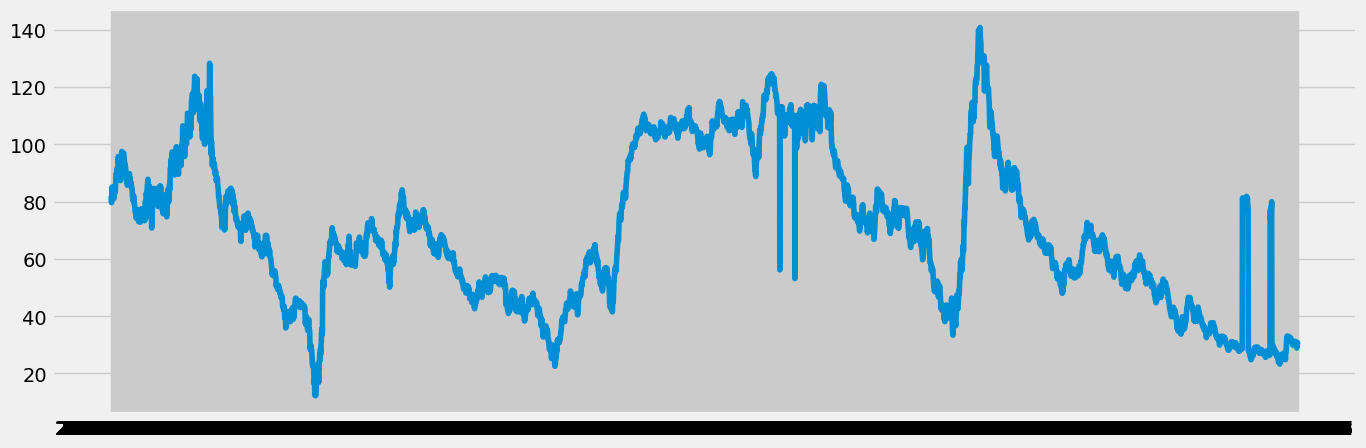

In [12]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data_2)
plt.show()

### 2. Data cleaning and wrangling (no need to subset)

In [13]:
# Checking for missing values

data_2.isnull().sum()

value    0
dtype: int64

##### No missing values

In [14]:
# Checking for duplicates

dups = data_2.duplicated()
dups.sum()

np.int64(1367)

##### My assumption here is that the duplicates represent values that are the same on multiple dates, which would NOT indicate a problem. Let's check...

In [15]:
data_2.index.duplicated().sum()

np.int64(0)

##### No duplicates that indicate an issue

### 3. Time-series analysis: decomposition

In [16]:
# Decompose the time series using an multiplicative model (due to the fact that the data is non-linear)

decomposition = sm.tsa.seasonal_decompose(
    data_2['value'],
    model='multiplicative',
    period=365)

In [17]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

<function matplotlib.pyplot.show(close=None, block=None)>

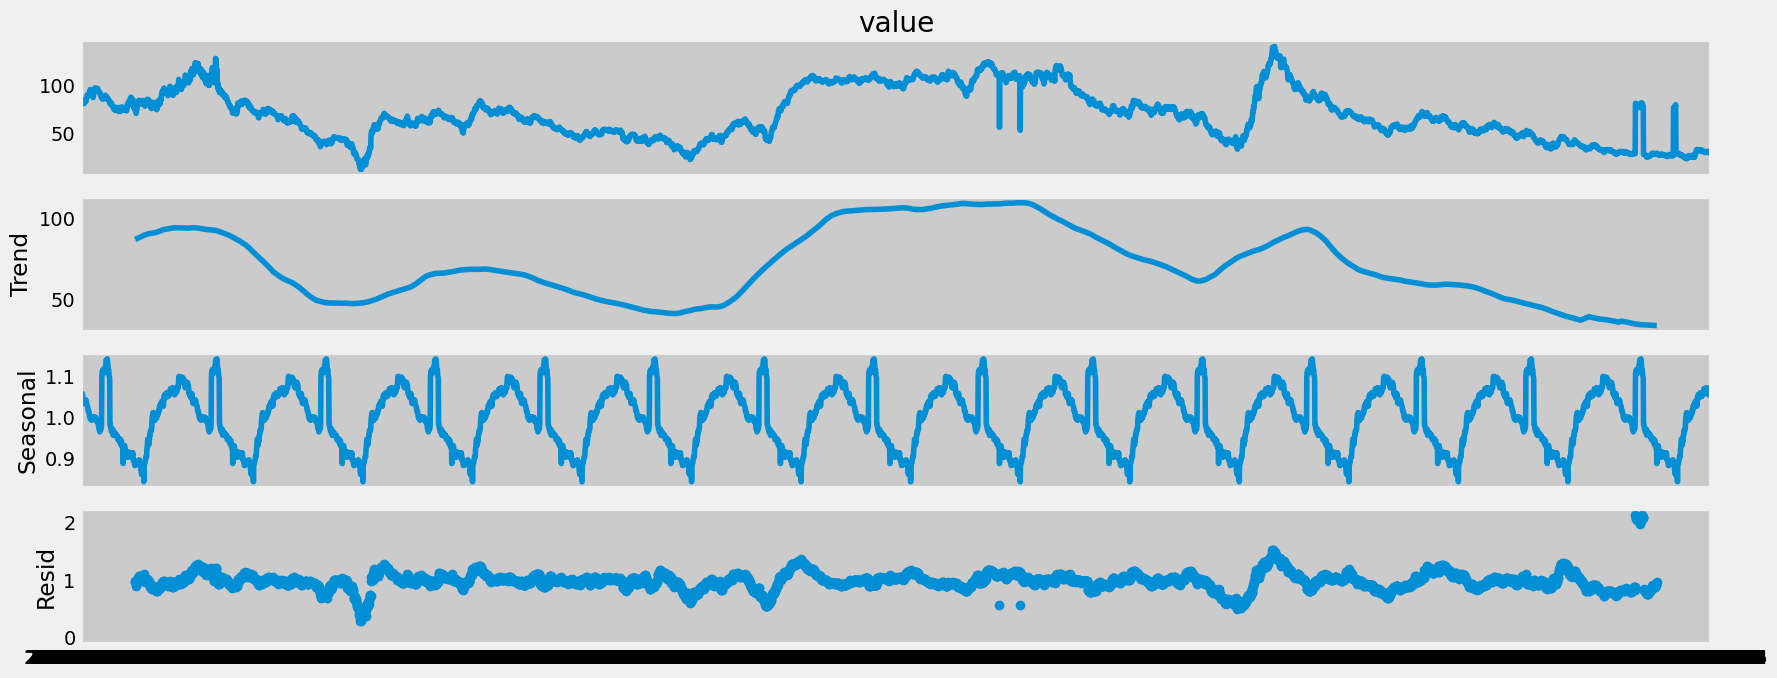

In [18]:
# Plot the components

decomposition.plot()
plt.show

##### Analyzing the results
Trend: Looking at the far left and the far right, the movement is downward, however there is significant rise and fall in between.

Seasonality: The recurring pattern indicates that seasonality is present. 

Noise: I do see some noiseindicated here. I don't know why the years aren't showing, which would potentially allow me to theorize the causes of the noise. 

### 4. Testing for stationarity

In [19]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_2['value'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.355587
p-value                           0.154666
Number of Lags Used              27.000000
Number of Observations Used    5407.000000
Critical Value (1%)              -3.431560
Critical Value (5%)              -2.862075
Critical Value (10%)             -2.567055
dtype: float64


##### Interpreting the results
The test statistic is larger than the critical values, so I cannot reject the null hypothesis, the data is non-stationary. 

### 5. Stationarizing with differencing

In [20]:
data_diff = data_2 - data_2.shift(1)

In [21]:
data_diff.dropna(inplace = True)

In [22]:
data_diff.head()

,value
date,
2023-12-04,-2.35
2023-12-01,2.91
2023-11-30,2.46
2023-11-29,-1.11
2023-11-28,-0.49


In [23]:
data_diff.columns

Index(['value'], dtype='object')

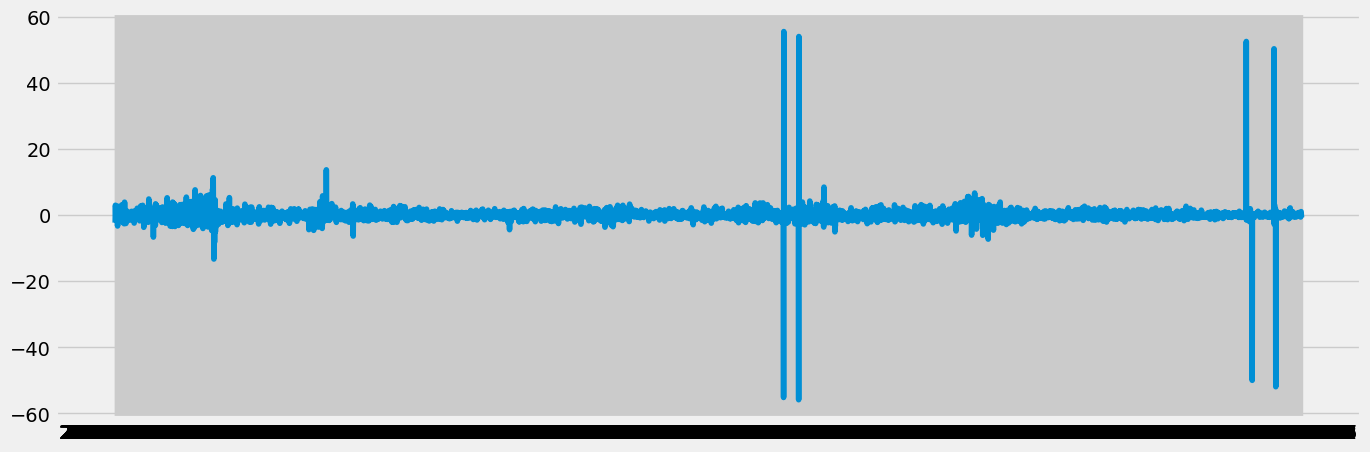

In [24]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)
plt.show()

In [25]:
# Re-running the Dickey-Fuller test:

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.522102e+01
p-value                        5.485180e-28
Number of Lags Used            2.600000e+01
Number of Observations Used    5.407000e+03
Critical Value (1%)           -3.431560e+00
Critical Value (5%)           -2.862075e+00
Critical Value (10%)          -2.567055e+00
dtype: float64


##### Interpreting the results
The test statistic is still larger than the critical values, so I still cannot reject the null hypothesis; the data is still non-stationary.

In [26]:
# Another round of differencing

data_diff_2 = data_diff - data_diff.shift(1)

In [27]:
data_diff_2.dropna(inplace = True)

In [28]:
data_diff_2.head()

,value
date,
2023-12-01,5.26
2023-11-30,-0.45
2023-11-29,-3.57
2023-11-28,0.62
2023-11-27,-0.16


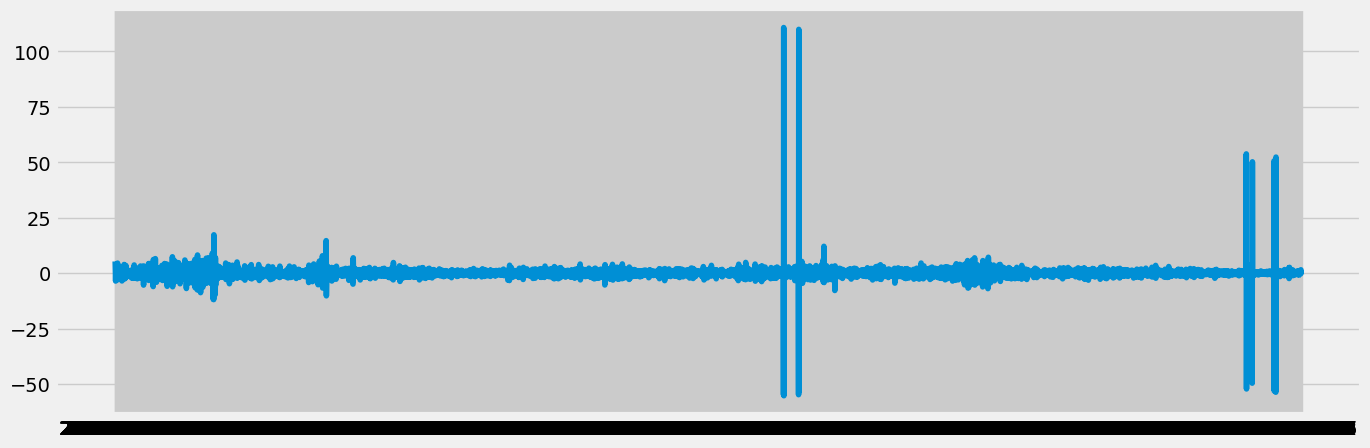

In [29]:
# Checking what the 2nd round did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)
plt.show()

In [30]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                  -21.883503
p-value                           0.000000
Number of Lags Used              32.000000
Number of Observations Used    5400.000000
Critical Value (1%)              -3.431562
Critical Value (5%)              -2.862075
Critical Value (10%)             -2.567055
dtype: float64


##### Interpretation
This time the test statistic is smaller than the critical values, which means I can reject the null hypothesis, the data is sationary!

### 6. Checking autocorrelations

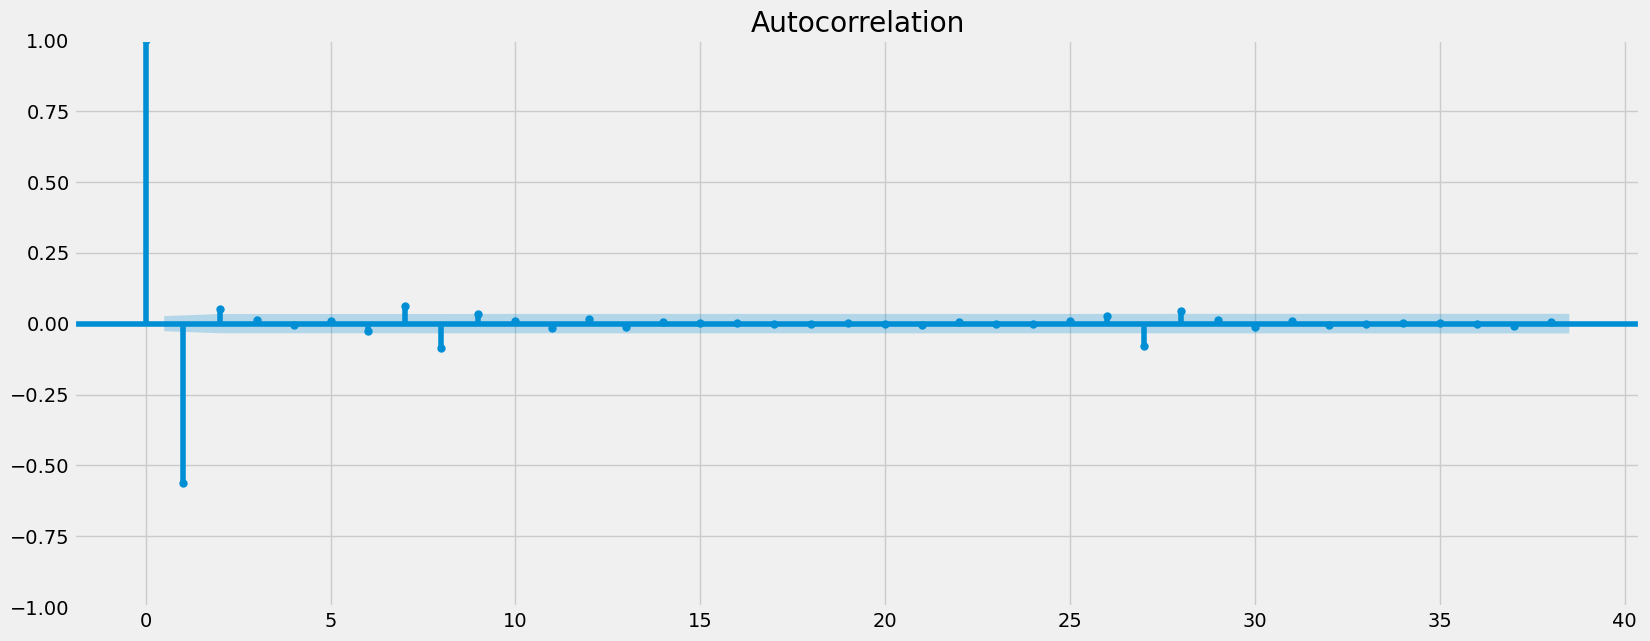

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff_2)
plt.show()